# 💰 Unit Economics of Token Inference

This notebook models the unit economics of Cohere's API usage, simulating revenue, cost, and gross margin per million tokens.

## 🧾 Defining the Unit

We define **1 unit** as processing **1 million tokens** through Cohere’s model API. This is the core economic driver.

## 📈 Revenue Per Unit

Using hypothetical pricing from our tiering model:

| Tier       | Price per 1M Tokens (USD) |
|------------|----------------------------|
| Starter    | $2.00                     |
| Growth     | $1.75                     |
| Pro        | $1.50                     |
| Enterprise | $1.20                     |

## ⚙️ Cost Estimation per Unit

Model inference cost depends on hardware, model size, and latency.

- Assume GPU cost: **$2.50/hour** (A100 spot pricing on AWS)
- Tokens/sec per GPU for a GPT-like model: **40 tokens/sec**
- Cost per 1M tokens = `($2.50 / 3600) * (1,000,000 / 40)` = ~$17.36

(Real world optimizations + batching can reduce this significantly.)

Let’s simulate costs under different scenarios.

In [1]:
import pandas as pd

# Revenue and Cost Simulation
pricing_per_million = {
    "Starter": 2.00,
    "Growth": 1.75,
    "Pro": 1.50,
    "Enterprise": 1.20
}

cost_scenarios = {
    "Baseline": 17.36,
    "Optimized": 8.50,
    "Heavily Optimized": 3.00
}

rows = []
for tier, price in pricing_per_million.items():
    for cost_label, cost_val in cost_scenarios.items():
        margin = price - cost_val
        rows.append({
            "Tier": tier,
            "Price": price,
            "Cost Scenario": cost_label,
            "Cost": cost_val,
            "Margin": margin
        })

df = pd.DataFrame(rows)
df

,Tier,Price,Cost Scenario,Cost,Margin
0,Starter,2.00,Baseline,17.36,-15.36
1,Starter,2.00,Optimized,8.50,-6.50
2,Starter,2.00,Heavily Optimized,3.00,-1.00
3,Growth,1.75,Baseline,17.36,-15.61
4,Growth,1.75,Optimized,8.50,-6.75
5,Growth,1.75,Heavily Optimized,3.00,-1.25
6,Pro,1.50,Baseline,17.36,-15.86
7,Pro,1.50,Optimized,8.50,-7.00
8,Pro,1.50,Heavily Optimized,3.00,-1.50
9,Enterprise,1.20,Baseline,17.36,-16.16


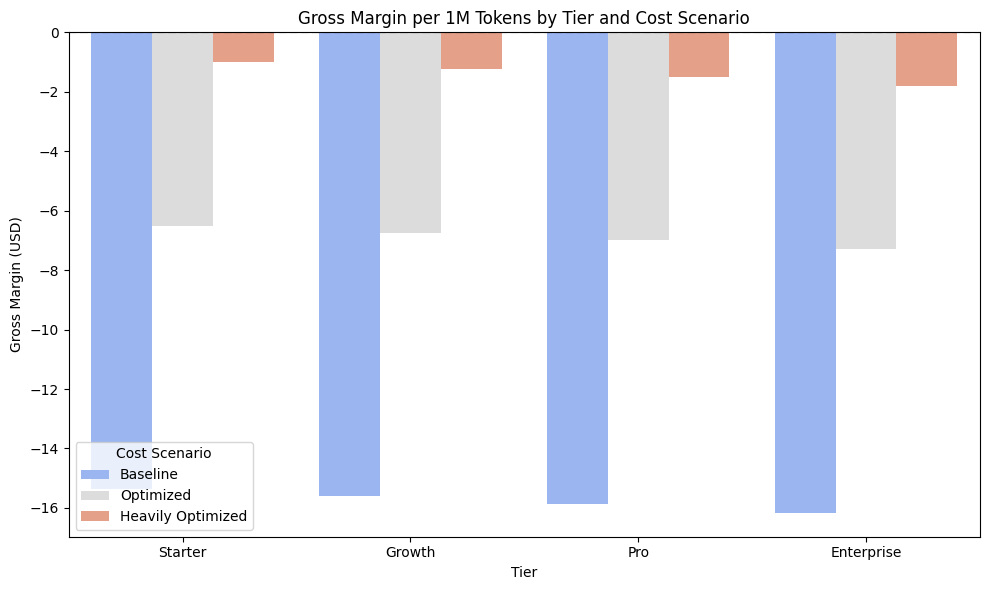

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Tier", y="Margin", hue="Cost Scenario", palette="coolwarm")
plt.axhline(0, color='black', linestyle='--')
plt.title("Gross Margin per 1M Tokens by Tier and Cost Scenario")
plt.ylabel("Gross Margin (USD)")
plt.xlabel("Tier")
plt.tight_layout()
plt.savefig('../report/graphics/unit_margin_sim.png')
plt.show()

## 📊 Summary of Insights

- **High cloud GPU costs** crush margins at low price points unless throughput is extremely optimized.
- **Starter and Growth tiers** are loss leaders unless costs are reduced dramatically.
- **Enterprise clients** offer much more margin flexibility due to contract pricing and volume guarantees.

Key takeaway: **scaling margin depends more on cost structure than pricing.**